In [1]:
import pandas as pd
import numpy as np
import re
import string
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [2]:
data = pd.read_csv("data_capec.csv")
data['text'] = data["text"].str.replace('/',' ')
X = data["text"]
y = data["label"]

# Tiền xử lý dữ liệu
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình


In [3]:
rlist =['000 - Normal', '126 - Path Traversal',
       '153 - Input Data Manipulation', '194 - Fake the Source of Data',
       '242 - Code Injection', '272 - Protocol Manipulation',
       '310 - Scanning for Vulnerable Software',
       '34 - HTTP Response Splitting', '66 - SQL Injection']

In [4]:
mapping = {l: i for i, l in enumerate(rlist)}
mapping

{'000 - Normal': 0,
 '126 - Path Traversal': 1,
 '153 - Input Data Manipulation': 2,
 '194 - Fake the Source of Data': 3,
 '242 - Code Injection': 4,
 '272 - Protocol Manipulation': 5,
 '310 - Scanning for Vulnerable Software': 6,
 '34 - HTTP Response Splitting': 7,
 '66 - SQL Injection': 8}

In [5]:
mapping['000 - Normal']

0

In [6]:
y_train = [mapping[s] for s in y_train] 
y_test = [mapping[r] for r in y_test]  

In [7]:
from keras.utils.np_utils import to_categorical

In [8]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = to_categorical(y_train, num_classes=9)
y_test = to_categorical(y_test ,num_classes=9)

In [10]:
X_train.shape

(290244, 100)

In [15]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model.add(GRU(units=32))
model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Đánh giá mô hình
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print(classification_report(y_test, y_pred, target_names=rlist, labels= range(9)))

Epoch 1/5
4536/4536 [==============================] - 110s 24ms/step - loss: 0.1454 - accuracy: 0.9578 - val_loss: 0.0526 - val_accuracy: 0.9835
Epoch 2/5
4536/4536 [==============================] - 110s 24ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 0.0406 - val_accuracy: 0.9870
Epoch 3/5
4536/4536 [==============================] - 109s 24ms/step - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.0340 - val_accuracy: 0.9883
Epoch 4/5
4536/4536 [==============================] - 111s 24ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.0308 - val_accuracy: 0.9898
Epoch 5/5
2268/2268 [==============================] - 11s 5ms/step
                                        precision    recall  f1-score   support

                          000 - Normal       0.98      0.99      0.99     17959
                  126 - Path Traversal       1.00      0.99      0.99      2312
         153 - Input Data Manipulation       0.00      0.00      0.00       219
         194 - Fake the Sou

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:

y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_predict = np.argmax(y_pred , axis=1)
y_test_pre = np.argmax(y_test, axis=1)


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_pre, y_predict)


In [19]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt

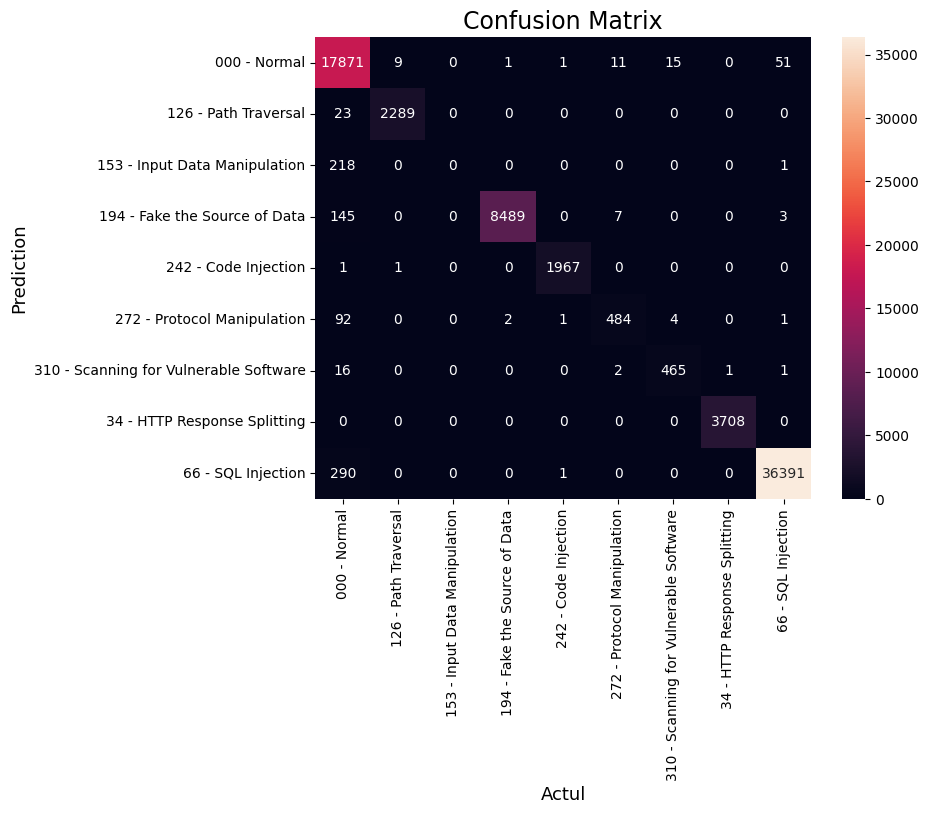

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='g',xticklabels = rlist,yticklabels= rlist)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actul',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [22]:
ong_tex = [tokenizer.sequences_to_texts(X_test)]
ong_tex[0][799]

'get blog index php 2560cat 2b 252fetc 252fpasswd 2560 my account edit profile 7b 7b 20data model url'

In [23]:
test_t ="POST /blog/index.php/my-account/edit-password/ username=pitifulFerret0&password=caMn#T8k&user-registration-login-nonce=6eac0e2d5f&_wp_http_referer=%2Fblog%2Findex.php%2Fmy-account%2Fedit-password%2F&login=Login&redirect=&rememberme=forever"

In [26]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model_lstm.add(LSTM(units=32))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(9, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Đánh giá mô hình
y_pred = model_lstm.predict(X_test)
y_pred = np.round(y_pred)
print(classification_report(y_test, y_pred, target_names=rlist, labels=range(9)))

Epoch 1/5
4536/4536 [==============================] - 212s 46ms/step - loss: 0.1340 - accuracy: 0.9615 - val_loss: 0.0481 - val_accuracy: 0.9848
Epoch 2/5
4536/4536 [==============================] - 188s 41ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.0389 - val_accuracy: 0.9876
Epoch 3/5
4536/4536 [==============================] - 195s 43ms/step - loss: 0.0384 - accuracy: 0.9875 - val_loss: 0.0370 - val_accuracy: 0.9880
Epoch 4/5
4536/4536 [==============================] - 219s 48ms/step - loss: 0.0333 - accuracy: 0.9891 - val_loss: 0.0338 - val_accuracy: 0.9891
Epoch 5/5
2268/2268 [==============================] - 31s 13ms/step
                                        precision    recall  f1-score   support

                          000 - Normal       0.98      1.00      0.99     17959
                  126 - Path Traversal       1.00      0.99      0.99      2312
         153 - Input Data Manipulation       0.00      0.00      0.00       219
         194 - Fake the So

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
y_predict = np.argmax(y_pred , axis=1)
y_test_pre = np.argmax(y_test, axis=1)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_pre, y_predict)

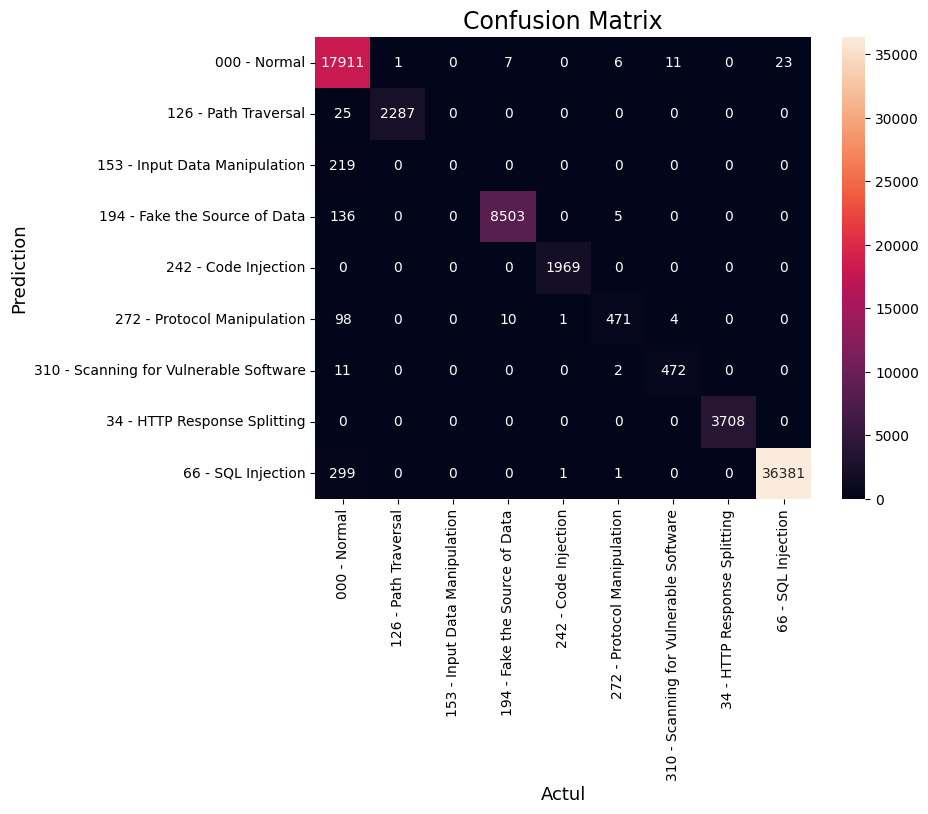

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='g',xticklabels = rlist,yticklabels= rlist)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actul',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


In [ ]:
model_lstm_1 = Sequential()
model_lstm_1.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model_lstm_1.add(LSTM(units=32,return_sequences=True))
model_lstm_1.add(LSTM(units=32))
model_lstm_1.add(Dropout(0.2))
model_lstm_1.add(Dense(9, activation='softmax'))

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Đánh giá mô hình
y_pred = model_lstm_1.predict(X_test)
y_pred = np.round(y_pred)
print(classification_report(y_test, y_pred, target_names=rlist, labels=range(9)))